<a href="https://colab.research.google.com/github/wangyiiing/MPA-MLF_Lab/blob/main/MPA_MLF_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

###################################
# Write your own code here #



###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#check the shape
print(X_train.shape)
print(X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


#### 1.2 Dataset examination

Using the following code, display random images,

In [6]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

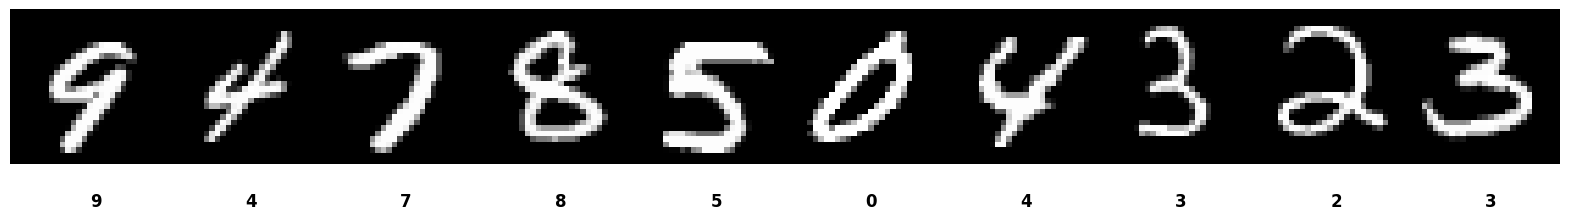

In [8]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?

Handwritten digits(0 to 9) as grayscale images. Each image is a 28x28 grid of pixel intensities (0-255).

- How many data samples do we have in train and test datasets?

Traning set:60,000 samples.
Test set: 10,000 samples.

- How many colour channels does the input variable have?

1 channel (grayscale). The input images are stored as 2D arrays (28, 28) but need to be reshaped to (28, 28, 1) for compatibility with convolutional layers.

- What is the size of the input images?

Each image is 28x28 pixels.

- What is the necessary preprocessing of the input data X?

Reshape: Add a channel dimension (e.g., X_train.reshape(60000, 28, 28, 1)).
Normalization: Scale pixel values to [0, 1] by dividing by 255.0.
Data type: Convert to float32 for computational efficiency.

- How many classes do we have in target varoable?

10 classes (digits 0 through 9).

- What is the necessary preprocessing of target variable y?

One-hot encoding: Convert integer labels (e.g., y_train = 5) to categorical vectors (e.g., [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]). Use to_categorical(y_train, 10).

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [7]:
###################################
# Write your own code here #

# Normalize input data (Min-Max Scaling)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data to add the channel dimension (28,28,1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Verify shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

###################################

X_train shape: (60000, 28, 28, 1), y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1), y_test shape: (10000, 10)


### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [8]:
###################################
# Write your own code here #

# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


###################################


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [9]:
#loss = None
#optimizer = None
#metrics = None
#learning_rate = 0.0

###################################
# Write your own code here #

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define an improved CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),  # Added extra Conv layer
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2, verbose=1)



###################################
model.summary()

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8421 - loss: 0.4912 - val_accuracy: 0.9825 - val_loss: 0.0627
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9758 - loss: 0.0755 - val_accuracy: 0.9862 - val_loss: 0.0441
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9847 - loss: 0.0521 - val_accuracy: 0.9899 - val_loss: 0.0372
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9875 - loss: 0.0382 - val_accuracy: 0.9908 - val_loss: 0.0333
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9900 - loss: 0.0289 - val_accuracy: 0.9883 - val_loss: 0.0408
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9913 - loss: 0.0270 - val_accuracy: 0.9919 - val_loss: 0.0321
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9926 - loss: 0.0217 - val_accuracy: 0.9902 - val_loss: 0.0328
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [10]:
###################################
# Write your own code here #

# Define training hyperparameters
epochs = 10
batch_size = 32

# Train the model
history = model.fit(
    X_train, y_train,                 # Training data
    epochs=epochs,                     # Number of training cycles
    batch_size=batch_size,             # Number of samples per batch
    validation_split=0.2,              # Use 20% of training data for validation
    verbose=1                          # Show training progress
)

###################################

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9953 - loss: 0.0161 - val_accuracy: 0.9918 - val_loss: 0.0377
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9964 - loss: 0.0104 - val_accuracy: 0.9905 - val_loss: 0.0450
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9888 - val_loss: 0.0498
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9962 - loss: 0.0106 - val_accuracy: 0.9923 - val_loss: 0.0352
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9960 - loss: 0.0116 - val_accuracy: 0.9902 - val_loss: 0.0505
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9974 - loss: 0.0082 - val_accuracy: 0.9899 - val_loss: 0.0515
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9964 - loss: 0.0104 - val_accuracy: 0.9900 - val_loss: 0.0504
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9978 - loss: 0.0070 

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

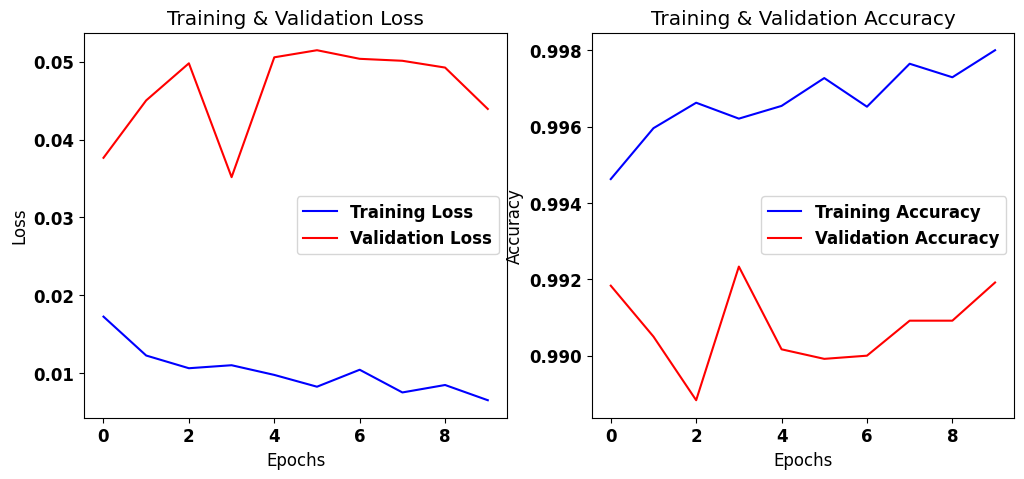

In [11]:
###################################
# Write your own code here #

# Extract loss and accuracy from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Loss Curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy Curves
plt.subplot(1,2,2)
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


###################################

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9890 - loss: 0.0417

Test Accuracy: 0.9920
Test Loss: 0.0318
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


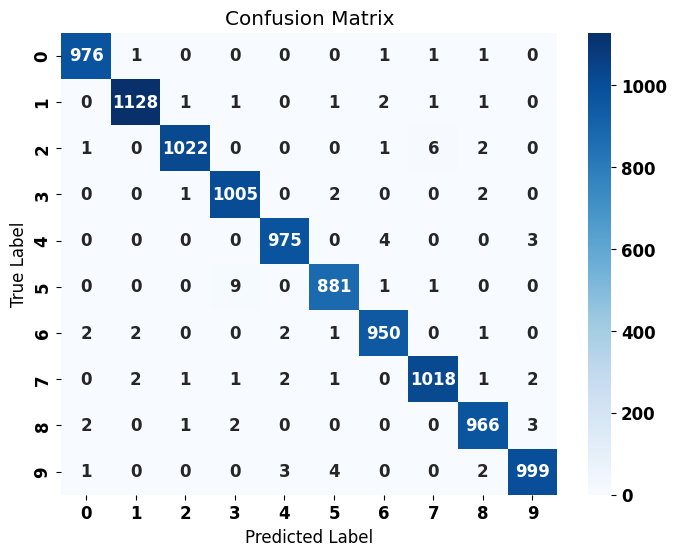

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [12]:
###################################
# Write your own code here #

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print accuracy
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print detailed classification report
print("Classification Report:\n", classification_report(y_true, y_pred))


###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Learning rate 0.1: best val_accuracy = 0.9025
Learning rate 0.01: best val_accuracy = 0.9783
Learning rate 0.001: best val_accuracy = 0.9905
Learning rate 0.0001: best val_accuracy = 0.9935
L2 strength 0.01: best val_accuracy = 0.9822
L2 strength 0.001: best val_accuracy = 0.9912
L2 strength 0.0001: best val_accuracy = 0.9905
Dropout rate 0.2: best val_accuracy = 0.9913
Dropout rate 0.3: best val_accuracy = 0.9895
Dropout rate 0.4: best val_accuracy = 0.9885
Dropout rate 0.5: best val_accuracy = 0.9892


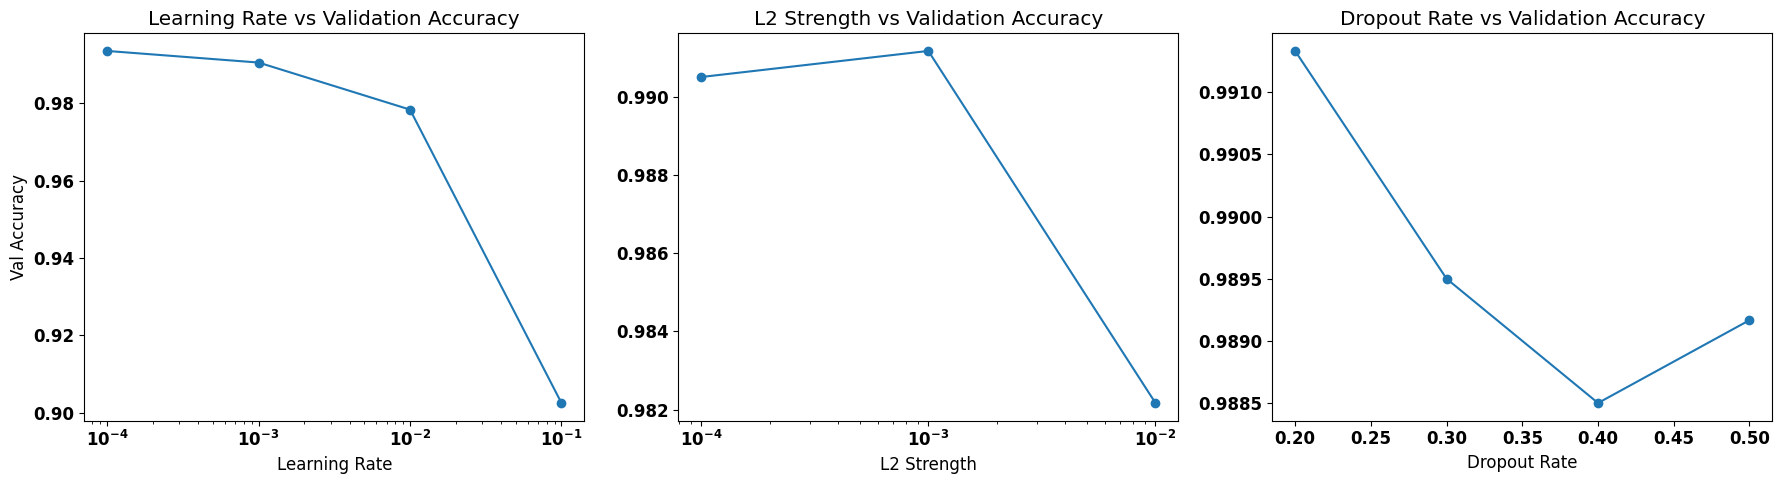


Best hyperparameters: lr=0.0001, L2=0.001, dropout=0.2
Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7161 - loss: 1.1839 - val_accuracy: 0.9657 - val_loss: 0.3957
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9502 - loss: 0.4305 - val_accuracy: 0.9810 - val_loss: 0.3203
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9658 - loss: 0.3573 - val_accuracy: 0.9858 - val_loss: 0.2814
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9731 - loss: 0.3095 - val_accuracy: 0.9883 - val_loss: 0.2496
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9764 - loss: 0.2749 - val_accuracy: 0.9880 - val_loss: 0.2234
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9806 - loss: 0.2370 - val_accuracy: 0.9897 - val_loss: 0.1988
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9836 - loss: 0.2078 - val_accuracy: 0.9903 - val_loss: 0.1753
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/

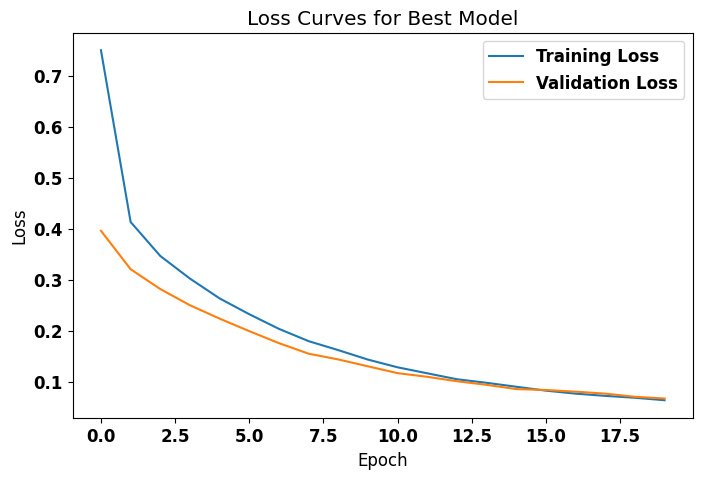

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


#Define a model builder that incorporates L2 regularization, dropout, and batch normalization

def create_model(reg_strength=0.001, dropout_rate=0.25):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu',
               kernel_regularizer=l2(reg_strength), input_shape=(28,28,1)),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(dropout_rate),

        Conv2D(64, (3,3), activation='relu',
               kernel_regularizer=l2(reg_strength)),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(dropout_rate),

        Flatten(),
        Dense(128, activation='relu',
              kernel_regularizer=l2(reg_strength)),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(10, activation='softmax')
    ])
    return model

#Define hyperparameter grids and early stopping
learning_rates = [0.1, 0.01, 0.001, 0.0001]
reg_strengths = [0.01, 0.001, 0.0001]
dropout_rates = [0.2, 0.3, 0.4, 0.5]
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Tune learning rate
lr_results = {}
for lr in learning_rates:
    model = create_model(reg_strength=0.001, dropout_rate=0.25)
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                        epochs=20,
                        validation_split=0.1,
                        batch_size=64,
                        callbacks=[es],
                        verbose=0)
    lr_results[lr] = max(history.history['val_accuracy'])
    print(f"Learning rate {lr}: best val_accuracy = {lr_results[lr]:.4f}")

#Tune L2 regularization strength
reg_results = {}
for reg in reg_strengths:
    model = create_model(reg_strength=reg, dropout_rate=0.25)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                        epochs=20,
                        validation_split=0.1,
                        batch_size=64,
                        callbacks=[es],
                        verbose=0)
    reg_results[reg] = max(history.history['val_accuracy'])
    print(f"L2 strength {reg}: best val_accuracy = {reg_results[reg]:.4f}")

#Tune dropout rate
drop_results = {}
for drop in dropout_rates:
    model = create_model(reg_strength=0.001, dropout_rate=drop)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                        epochs=20,
                        validation_split=0.1,
                        batch_size=64,
                        callbacks=[es],
                        verbose=0)
    drop_results[drop] = max(history.history['val_accuracy'])
    print(f"Dropout rate {drop}: best val_accuracy = {drop_results[drop]:.4f}")

#Visualize tuning results
plt.figure(figsize=(18,5))

# Learning rate
plt.subplot(1,3,1)
plt.plot(list(lr_results.keys()), list(lr_results.values()), marker='o')
plt.xscale('log')
plt.title('Learning Rate vs Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Val Accuracy')

# L2 strength
plt.subplot(1,3,2)
plt.plot(list(reg_results.keys()), list(reg_results.values()), marker='o')
plt.xscale('log')
plt.title('L2 Strength vs Validation Accuracy')
plt.xlabel('L2 Strength')

# Dropout rate
plt.subplot(1,3,3)
plt.plot(list(drop_results.keys()), list(drop_results.values()), marker='o')
plt.title('Dropout Rate vs Validation Accuracy')
plt.xlabel('Dropout Rate')

plt.tight_layout()
plt.show()

#Retrain best model and plot loss curves to check overfitting
best_lr = max(lr_results, key=lr_results.get)
best_reg = max(reg_results, key=reg_results.get)
best_drop = max(drop_results, key=drop_results.get)

print(f"\nBest hyperparameters: lr={best_lr}, L2={best_reg}, dropout={best_drop}")

model = create_model(reg_strength=best_reg, dropout_rate=best_drop)
model.compile(optimizer=Adam(learning_rate=best_lr),
              loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_split=0.1,
                    batch_size=64,
                    callbacks=[es],
                    verbose=1)

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curves for Best Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()